# 필요라이브러리설치&압축파일풀기

In [4]:
# 필요한 라이브러리 설치
!pip install soundata pandas librosa plotly matplotlib mutagen pillow tensorflow[and-cuda]==2.15 scikit-learn 

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached nvidia_cublas_cu12-12.2.5.6-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.2.142-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvcc_cu12-12.2.140-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.2.140-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.2.1

In [5]:
!pip install tensorflow[and-cuda]==2.13


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [7]:
# 데이터 다운로드
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data


INFO: Downloading ['all', 'index']. Index is being stored in /home/jovyan/.local/lib/python3.10/site-packages/soundata/datasets/indexes, and the rest of files in /home/jovyan/sound_datasets/urbansound8k
INFO: [all] downloading UrbanSound8K.tar.gz
INFO: /home/jovyan/sound_datasets/urbansound8k/UrbanSound8K.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: /home/jovyan/sound_datasets/urbansound8k/audio already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/metadata already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/UrbanSound8K_README.txt already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/FREESOUNDCREDITS.txt already exists. Run with force_overwrite=True to download from scratch
INFO: [index] downloading urbansoun

Clip(
  audio_path="/home/jovyan/sound_datasets/urbansound8k/audio/fold6/108638-9-0-0.wav",
  clip_id="108638-9-0-0",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_

# 라이브러리 부르기

In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import plotly.express as px
import matplotlib.pyplot as plt
import mutagen
from PIL import Image
from tqdm import tqdm
import gc

# 데이터 확인

UrbanSound8K

In [2]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/home/jovyan/sound_datasets/urbansound8k/audio/', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df
dataset_df = create_dataset_df('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
# 데이터의 평균길이
dataset_df['duration'] = dataset_df['end'] - dataset_df['start']
test_file = '/home/jovyan/sound_datasets/urbansound8k/audio/fold5/100263-2-0-117.wav'
home_directory = '/home/jovyan/sound_datasets/urbansound8k/'

y, sr = librosa.load(test_file)

print('Sample rate: ' + str(sr))

Sample rate: 22050


In [3]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/home/jovyan/sound_datasets/urbansound8k/audio/', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df

In [4]:
dataset_df = create_dataset_df('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
dataset_df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,filepath
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,/home/jovyan/sound_datasets/urbansound8k/audio...
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...


In [5]:
dataset_df.groupby('class').slice_file_name.count()

class
air_conditioner     1000
car_horn             429
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
gun_shot             374
jackhammer          1000
siren                929
street_music        1000
Name: slice_file_name, dtype: int64

In [6]:
# 데이터의 평균길이
dataset_df['duration'] = dataset_df['end'] - dataset_df['start']
dataset_df['duration'].describe()

count    8732.000000
mean        3.607904
std         0.973570
min         0.054517
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: duration, dtype: float64

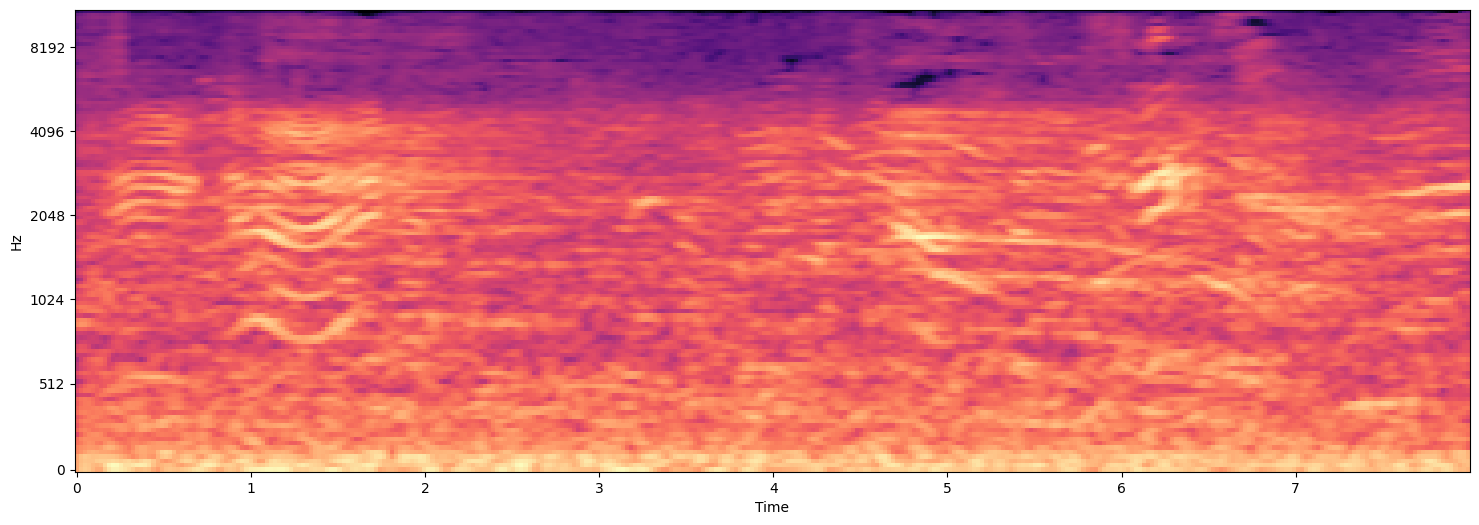

In [7]:
# 멜 스펙트로그램
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
Sdb = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(18, 6))
librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='mel')
plt.show()

BabyCry

In [8]:
# zipfile 풀기
import zipfile 

baby_home_directory = '/home/jovyan/sound_datasets/babycry/' # baby 데이터가있는 디렉토리
# file_name = "/home/jovyan/sound_datasets/babycry/archive.zip"

# zip_file = zipfile.ZipFile(file_name)
# zip_file.extractall(path=baby_home_directory)

In [9]:
# sr 확인(urbansound와 같음)

test_file = baby_home_directory + '549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav'

audio, sr = librosa.load(test_file)
file_list = os.listdir(baby_home_directory)
size = len(file_list)

print('Sample rate: ' + str(sr))
print(size)

Sample rate: 22050
458


<Figure size 640x480 with 0 Axes>

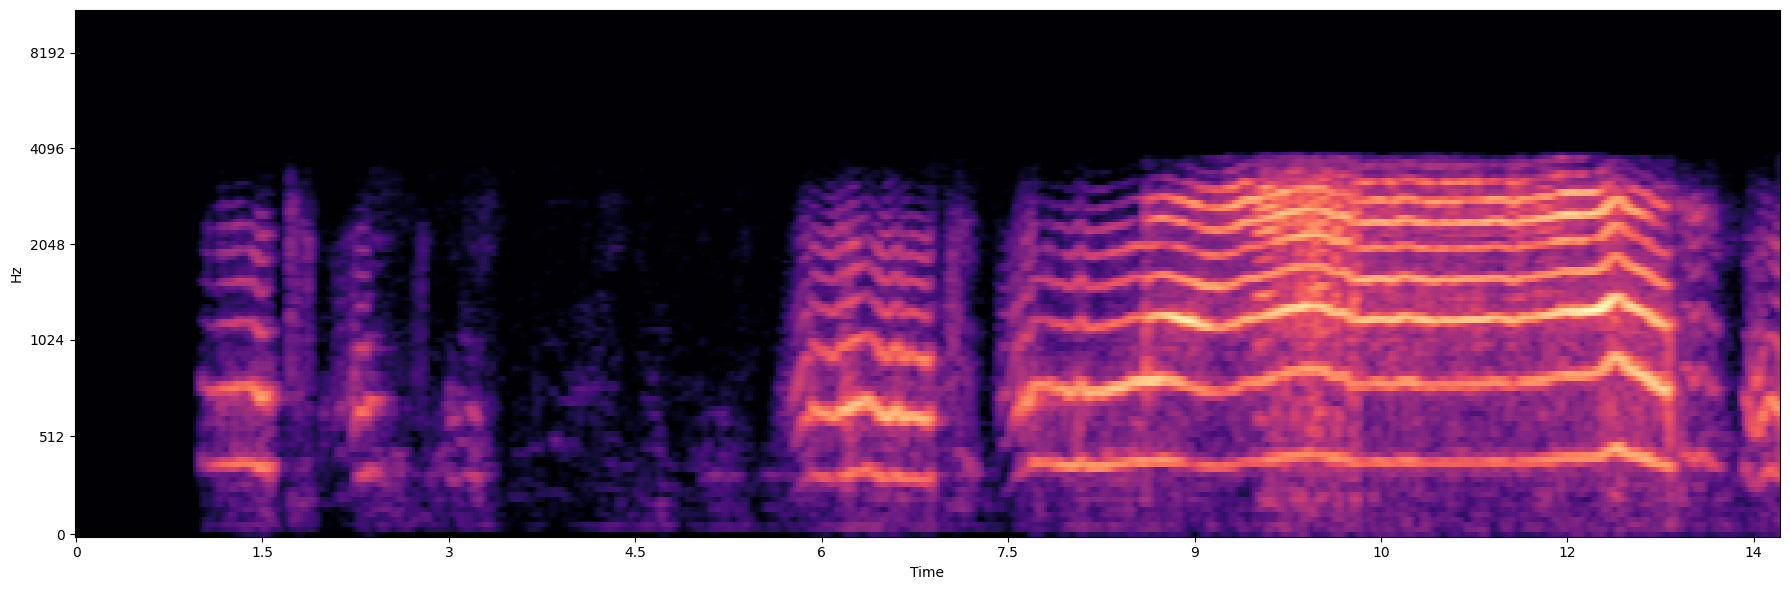

In [10]:
# 멜 스펙트로그램
S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
Sdb = librosa.power_to_db(S, ref=np.max)

plt.clf()
plt.figure(figsize=(18, 6))

librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='mel')
plt.tight_layout()
plt.show()

# 함수정의

In [11]:
# 함수정의

# 오디오 신호 시간대 맞추기
def load_audio(file_name):
    y, sr = librosa.load(file_name)
    # 오디오 신호의 시작과 끝의 정적인 소음 제거
    yt, index = librosa.effects.trim(y, top_db=20)       

    # 4초로 맞추기
    if len(yt) > (sr*4):
        yt = yt[:(sr*4)]
    else:
        padding = (sr*4) - len(yt)
        offset = padding // 2
        yt = np.pad(yt, (offset, (sr*4) - len(yt) - offset), 'constant')
  
    return yt

# mel처리하는 코드 -> 특징의 평균값 반환
def features_extractor(file):
    audio, sr = librosa.load(file_name) 
    mel_features = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
    mel_scaled_features = librosa.power_to_db(mel_features, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_scaled_features, sr=sr, x_axis='time', y_axis='mel')
    
    base_name = os.path.basename(file).replace('.wav', '.png')
    plt.savefig(f'./mel1/{base_name}', bbox_inches='tight', pad_inches=0)
    plt.close()
    
    return mel_scaled_features
    

    # mel_scaled_features = np.mean(mel_features.T,axis=0) # 1차원배열로 반환 -> cnn에 알맞지 않음
    # mel_scaled_features = mel_features.T # 2차원배열로 반환(n_mels, n_frames)
    # return mel_scaled_features

In [12]:
# 멜 처리할 때부터 클래스번호를 지정해주기(babycry에만 적용하기)
def features_extractor_r(file):
    audio = load_audio(file)
    mel_features = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
    mel_scaled_features = librosa.power_to_db(mel_features, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_scaled_features, sr=sr, x_axis='time', y_axis='mel')

    filename = f"babycry{file_index}-10-{file_name}.png"
    save_path = os.path.join('', filename)
    plt.savefig(f'./mel1/{filename}', bbox_inches='tight', pad_inches=0)
    plt.close()
    
    return mel_scaled_features

In [ ]:
sound_dic = {
    'air_conditioner':'0',
    'car_horn':'1',
    'children_playing':'2',
    'dog_bark':'3',
    'drilling':'4',
    'engine_idling':'5',
    'gun_shot':'6',
    'jackhammer':'7',
    'siren':'8',
    'street_musics':'9'
}
# extracted_features_df['class_id'] = extracted_features_df['class'].map(sound_dic)

# # X=np.array(extracted_features_df['feature']) # shape = (8732, 128)
# y=np.array(extracted_features_df['class_id'])

# print(y)

# 전처리

In [ ]:
# UrbanSound8K 오디오 파일에 대한 mel 추출
audio_dataset_path= '/home/jovyan/sound_datasets/urbansound8k/audio/'
extracted_features=[]
metadata = pd.read_csv('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    final_class_labels=row["class"]
    
    # pre_data = load_audio(file_name)
    data=features_extractor(file_name) # ParameterError: Audio data must be floating-point 에러가 가끔 발생함
    extracted_features.append([data,final_class_labels])
# babycry 오디오 파일에 대한 mel 추출
baby_dataset_path = '/home/jovyan/sound_datasets/babycry/'
extracted_features_baby = []
    features_extractor_r

    # 메모리 정리
    del data
    gc.collect()

# CNN

In [ ]:
# h5로 저장
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = '/home/jovyan/mel/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 1000, 400  # 이미지 크기 설정 (64x64)
batch_size = 34  # 배치 크기 설정
epochs = 50  # 학습 에포크 수 설정
num_classes = 10  # 클래스 수 설정 (총 9개 클래스)

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    # 모델 컴파일
    model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

    return model


# 데이터셋 준비
X_data = []  # 이미지 데이터 배열 # data_directory['feature']
y_data = [] # 레이블 배열 # data_dirctory['class_id'] -> 딕셔너리 만들어서 숫자로 배당....?
print(0)
# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = filename.split('-')[1]
        # 이미지 파일 경로 설정
        img_path = os.path.join(data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
        X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
        y_data.append(class_number)  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)

print(1)
# 체크포인트 정의
checkpoint = ModelCheckpoint("weights.h5", 
                              monitor='val_accuracy', 
                              verbose=1, 
                              save_best_only=True, 
                              mode='max', 
                              save_weights_only=True)

print(2)
# 모델 학습
history = model.fit(
    X_train, y_train,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    callbacks=[checkpoint]  # 콜백 추가
)
print(3)
model.save('model.h5')


# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 예측 및 성능 평가
Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# # 가중치 저장
# fname = "weights-Test-CNN.hdf5"
# model.save_weights(fname, overwirte=True)

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)

2024-07-31 15:45:02.127002: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-31 15:45:02.639989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 15:45:04.798293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


시작 시간: Wed Jul 31 15:45:07 2024
0


## 특정클래스만 학습하고 교차검증까지(baby X)

시작 시간: Wed Jul 31 05:02:23 2024
Epoch 1/50
19/23 [=======================>......] - ETA: 0s - loss: 0.9347 - accuracy: 0.5759
Epoch 1: val_accuracy improved from -inf to 0.75897, saving model to weights.h5
23/23 [==============================] - 2s 19ms/step - loss: 0.8919 - accuracy: 0.5997 - val_loss: 0.5590 - val_accuracy: 0.7590
Epoch 2/50
21/23 [==========================>...] - ETA: 0s - loss: 0.6476 - accuracy: 0.7605
Epoch 2: val_accuracy improved from 0.75897 to 0.82564, saving model to weights.h5
23/23 [==============================] - 0s 9ms/step - loss: 0.6323 - accuracy: 0.7671 - val_loss: 0.4512 - val_accuracy: 0.8256
Epoch 3/50
21/23 [==========================>...] - ETA: 0s - loss: 0.5029 - accuracy: 0.8123
Epoch 3: val_accuracy improved from 0.82564 to 0.84103, saving model to weights.h5
23/23 [==============================] - 0s 9ms/step - loss: 0.4957 - accuracy: 0.8134 - val_loss: 0.4076 - val_accuracy: 0.8410
Epoch 4/50
21/23 [==========================>...] - 

/home/jovyan/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Test Loss: 0.0025722431018948555, Test Accuracy: 1.0
14/14 [==============================] - 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00       159

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417

Confusion Matrix:

[[ 56   0   0]
 [  0 202   0]
 [  0   0 159]]
종료 시간: Wed Jul 31 05:02:45 2024
소요 시간: 22.20초


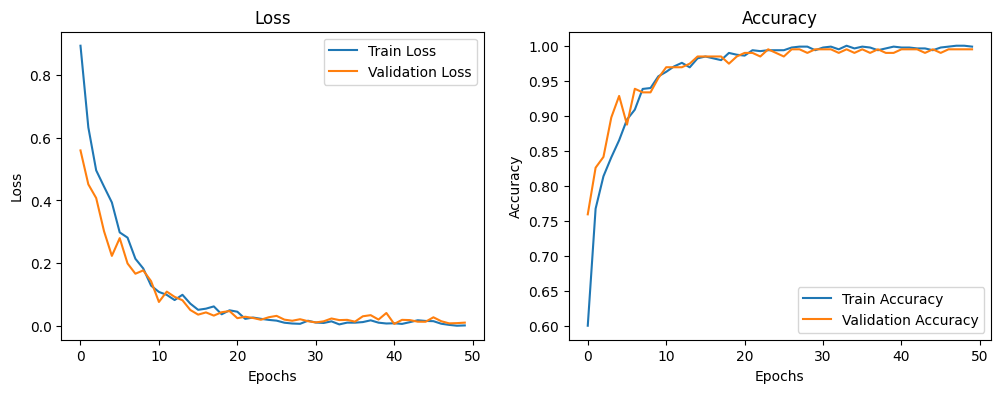

In [35]:
# 특정클래스만 학습
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = '/home/jovyan/mel/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기 설정 (64x64)
batch_size = 34  # 배치 크기 설정
epochs = 50  # 학습 에포크 수 설정
num_classes = 3  # 클래스 수 설정 (총 9개 클래스)

# 클래스 번호 매핑
class_mapping = {'1': 0, '7': 1, '8': 2}

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    # 모델 컴파일
    model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

    return model


# 데이터셋 준비
X_data = []  # 이미지 데이터 배열 # data_directory['feature']
y_data = [] # 레이블 배열 # data_dirctory['class_id'] -> 딕셔너리 만들어서 숫자로 배당....?

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = filename.split('-')[1]
        if class_number in class_mapping : 
            # 이미지 파일 경로 설정
            img_path = os.path.join(data_directory, filename)
            # 이미지 불러오기 및 전처리
            img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
            img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
            X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
            y_data.append(class_mapping[class_number])  # 클래스 번호를 y_data 리스트에 추가
        else : 
            pass

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)


# 체크포인트 정의
checkpoint = ModelCheckpoint("weights.h5", 
                              monitor='val_accuracy', 
                              verbose=1, 
                              save_best_only=True, 
                              mode='max', 
                              save_weights_only=True)


# 모델 학습
history = model.fit(
    X_train, y_train,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    callbacks=[checkpoint]  # 콜백 추가
)

model.save('model.h5')


# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 예측 및 성능 평가
Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# # 가중치 저장
# fname = "weights-Test-CNN.hdf5"
# model.save_weights(fname, overwirte=True)

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))

14/14 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Test Loss: 0.0025722431018948555, Test Accuracy: 1.0
14/14 [==============================] - 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00       159

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417

Confusion Matrix:

[[ 56   0   0]
 [  0 202   0]
 [  0   0 159]]


In [39]:
from sklearn.model_selection import KFold
k = 5  # 폴드 수 설정
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_no = 1
results = []

for train_index, val_index in kf.split(X_data):
    print(f'Fold {fold_no}')
    
    X_train, X_val = X_data[train_index], X_data[val_index]
    y_train, y_val = y_data[train_index], y_data[val_index]

    model = create_cnn_model((img_height, img_width, 3), num_classes)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val)
    )
    
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {val_loss}')
    print(f'Validation Accuracy: {val_acc}')
    results.append((val_loss, val_acc))
    
    fold_no += 1

# 교차 검증 결과 출력
average_val_loss = np.mean([result[0] for result in results])
average_val_acc = np.mean([result[1] for result in results])
print(f'Average Validation Loss: {average_val_loss}')
print(f'Average Validation Accuracy: {average_val_acc}')


Fold 1
Epoch 1/50
33/33 [==============================] - 2s 22ms/step - loss: 0.8421 - accuracy: 0.6598 - val_loss: 0.7127 - val_accuracy: 0.6906
Epoch 2/50
33/33 [==============================] - 0s 6ms/step - loss: 0.5785 - accuracy: 0.7903 - val_loss: 0.3805 - val_accuracy: 0.8561
Epoch 3/50
33/33 [==============================] - 0s 6ms/step - loss: 0.3758 - accuracy: 0.8686 - val_loss: 0.2764 - val_accuracy: 0.8957
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.2287 - accuracy: 0.9181 - val_loss: 0.1951 - val_accuracy: 0.9281
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 0.2034 - accuracy: 0.9379 - val_loss: 0.1396 - val_accuracy: 0.9676
Epoch 6/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1246 - accuracy: 0.9577 - val_loss: 0.1215 - val_accuracy: 0.9532
Epoch 7/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1152 - accuracy: 0.9640 - val_loss: 0.0929 - val_accuracy: 0.9784
Epoch 8/50
3

## babycry 추가

In [ ]:
# 특정클래스만 학습 + baby 넣기
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = '/home/jovyan/mel_baby/'  # 멜 스펙트로그램 데이터 디렉토리 경로

if not os.path.exists(data_directory):
    os.makedirs(data_directory)

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기 설정 (64x64)
batch_size = 34  # 배치 크기 설정
epochs = 50  # 학습 에포크 수 설정
num_classes = 3  # 클래스 수 설정 (총 9개 클래스)

# 클래스 번호 매핑
class_mapping = {'1': 1, '7': 2, '8': 3 ,'10' : 4}

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    # 모델 컴파일
    model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

    return model


# 데이터셋 준비
X_data = []  # 이미지 데이터 배열 # data_directory['feature']
y_data = [] # 레이블 배열 # data_dirctory['class_id'] -> 딕셔너리 만들어서 숫자로 배당....?

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = filename.split('-')[1]
        if class_number in class_mapping : 
            # 이미지 파일 경로 설정
            img_path = os.path.join(data_directory, filename)
            # 이미지 불러오기 및 전처리
            img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
            img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
            X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
            y_data.append(class_mapping[class_number])  # 클래스 번호를 y_data 리스트에 추가
        else : 
            pass

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)


# 체크포인트 정의
checkpoint = ModelCheckpoint("weights.h5", 
                              monitor='val_accuracy', 
                              verbose=1, 
                              save_best_only=True, 
                              mode='max', 
                              save_weights_only=True)


# 모델 학습
history = model.fit(
    X_train, y_train,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    callbacks=[checkpoint]  # 콜백 추가
)

model.save('model.h5')


# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 예측 및 성능 평가
Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력


# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)

# 교차검증 (혼동행렬검증, kfold)

교차검증(cnn)

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))


50/50 [==============================] - 0s 5ms/step - loss: 0.5471 - accuracy: 0.9006
Test Loss: 0.547072172164917, Test Accuracy: 0.9005628228187561
50/50 [==============================] - 0s 3ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       194
           1       0.98      0.98      0.98        55
           2       0.82      0.84      0.83       190
           3       0.89      0.83      0.86       169
           4       0.88      0.84      0.86       146
           5       0.92      0.94      0.93       234
           6       0.92      0.97      0.94        95
           7       0.93      0.95      0.94       215
           8       0.96      0.92      0.94       149
           9       0.85      0.83      0.84       152

    accuracy                           0.90      1599
   macro avg       0.91      0.91      0.91      1599
weighted avg       0.90      0.90      0.90      1599

Confusion Mat

k-fold 교차 검증

In [24]:
k = 10  # 폴드 수 설정
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_no = 1
results = []

for train_index, val_index in kf.split(X_data):
    print(f'Fold {fold_no}')
    
    X_train, X_val = X_data[train_index], X_data[val_index]
    y_train, y_val = y_data[train_index], y_data[val_index]

    model = create_cnn_model((img_height, img_width, 3), num_classes)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val)
    )
    
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')
    results.append((val_loss, val_acc))
    
    fold_no += 1

# 교차 검증 결과 출력
average_val_loss = np.mean([result[0] for result in results])
average_val_acc = np.mean([result[1] for result in results])
print(f'Average Validation Loss: {average_val_loss}')
print(f'Average Validation Accuracy: {average_val_acc}')


Fold 1
Epoch 1/50
141/141 [==============================] - 4s 7ms/step - loss: 1.9053 - accuracy: 0.2879 - val_loss: 1.4144 - val_accuracy: 0.5310
Epoch 2/50
141/141 [==============================] - 1s 4ms/step - loss: 1.4125 - accuracy: 0.4985 - val_loss: 1.1056 - val_accuracy: 0.6510
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 1.1740 - accuracy: 0.5841 - val_loss: 1.0026 - val_accuracy: 0.6435
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.9992 - accuracy: 0.6504 - val_loss: 0.8341 - val_accuracy: 0.7129
Epoch 5/50
141/141 [==============================] - 1s 4ms/step - loss: 0.8649 - accuracy: 0.7101 - val_loss: 0.7245 - val_accuracy: 0.7730
Epoch 6/50
141/141 [==============================] - 1s 5ms/step - loss: 0.7519 - accuracy: 0.7499 - val_loss: 0.6627 - val_accuracy: 0.7805
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.6687 - accuracy: 0.7829 - val_loss: 0.6375 - val_accuracy: 0.7861

# 다른모델정확성비교

SVM

In [27]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
base_data_directory = '/home/jovyan/mel/'

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기를 더 작게 설정하여 메모리 사용량 줄이기
num_classes = 10  # 클래스 수 (예: babycry, boil, carhorn, door, emergencysiren, firesiren, gas, glass, stillsiren)

# 데이터셋 준비
X = []  # 이미지 데이터를 저장할 리스트
y = []  # 클래스 라벨을 저장할 리스트

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(base_data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일 이름에서 클래스 번호를 추출한다고 가정)
        class_number = int(filename.split('-')[1])
        # 이미지 파일 경로
        img_path = os.path.join(base_data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화 (0-1 범위)
        X.append(img_array.flatten())  # 이미지 배열을 평탄화하여 X 리스트에 추가
        y.append(class_number)  # 클래스 번호를 y 리스트에 추가

# 리스트를 numpy 배열로 변환
X = np.array(X)
y = np.array(y)

# 데이터셋을 학습 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA를 사용하여 데이터의 차원을 줄임
n_components = 100  # PCA 차원 수 설정
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# SVM 모델 생성 및 학습
svm_model = SVC(kernel='linear', random_state=42)  # SVM 모델 생성 (선형 커널 사용)
svm_model.fit(X_train_pca, y_train)  # 학습 데이터로 모델 훈련

# 모델 평가
y_val_pred = svm_model.predict(X_val_pca)  # 검증 데이터로 예측

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_val_pred))  # 혼동 행렬 출력

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")


시작 시간: Wed Jul 31 01:26:38 2024
Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       194
           1       0.84      0.96      0.90        55
           2       0.64      0.68      0.66       190
           3       0.81      0.71      0.76       169
           4       0.79      0.79      0.79       146
           5       0.85      0.80      0.82       234
           6       0.94      0.94      0.94        95
           7       0.85      0.81      0.83       215
           8       0.80      0.83      0.81       149
           9       0.70      0.61      0.65       152

    accuracy                           0.78      1599
   macro avg       0.79      0.80      0.79      1599
weighted avg       0.79      0.78      0.78      1599

Confusion Matrix:

[[167   0   8   0   2   3   0   5   2   7]
 [  0  53   0   1   0   0   1   0   0   0]
 [ 15   2 129   8   4   8   1   1   6  16]
 [  9   4  17 120   1   5   3   0   5

RandomForest

In [28]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
base_data_directory = '/home/jovyan/mel/'

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 128, 128  # 이미지 크기 설정
num_classes = 10  # 클래스 수 (예: babycry, boil, carhorn, door, emergencysiren, firesiren, gas, glass, stillsiren)

# 데이터셋 준비
X = []
y = []

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(base_data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출
        class_number = int(filename.split('-')[1])
        # 이미지 파일 경로
        img_path = os.path.join(base_data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
        X.append(img_array.flatten())  # 이미지 배열을 평탄화하여 X 리스트에 추가
        y.append(class_number)  # 클래스 번호를 y 리스트에 추가

# 리스트를 numpy 배열로 변환
X = np.array(X)
y = np.array(y)

# 데이터셋을 학습 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 이미지 데이터를 원래 2D 형태로 유지 (공간적 구조를 잃지 않도록)
# Random Forest는 1D 벡터를 입력으로 받으므로, 이미지를 평탄화한 후 사용합니다.
# 그러나 이렇게 하면 공간적 구조를 잃게 됩니다.
# 이를 보완하기 위해 각 픽셀 위치 정보를 특징으로 포함합니다.

# 이미지를 2D 배열 형태로 변환
X_train_reshaped = X_train.reshape(-1, img_height, img_width, 3)
X_val_reshaped = X_val.reshape(-1, img_height, img_width, 3)

# 각 픽셀 위치를 특징으로 변환
# 이미지의 각 픽셀 (i, j)의 RGB 값을 사용하여 특징 벡터를 구성합니다.
X_train_features = np.zeros((X_train.shape[0], img_height * img_width * 3))
X_val_features = np.zeros((X_val.shape[0], img_height * img_width * 3))

# 각 픽셀의 위치를 반영하여 특징 벡터 생성
for i in range(img_height):
    for j in range(img_width):
        for k in range(3):  # RGB 채널
            X_train_features[:, i*img_width*3 + j*3 + k] = X_train_reshaped[:, i, j, k]
            X_val_features[:, i*img_width*3 + j*3 + k] = X_val_reshaped[:, i, j, k]

# Random Forest 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# 모델 평가
y_val_pred = rf_model.predict(X_val_features)

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=[str(i) for i in range(num_classes)]))
print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_val_pred))

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")


시작 시간: Wed Jul 31 01:28:51 2024
Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       194
           1       0.89      0.76      0.82        55
           2       0.60      0.60      0.60       190
           3       0.76      0.65      0.70       169
           4       0.83      0.75      0.79       146
           5       0.81      0.82      0.82       234
           6       0.91      0.91      0.91        95
           7       0.79      0.92      0.85       215
           8       0.84      0.73      0.78       149
           9       0.67      0.61      0.64       152

    accuracy                           0.77      1599
   macro avg       0.78      0.76      0.77      1599
weighted avg       0.77      0.77      0.76      1599

Confusion Matrix:

[[170   0   4   1   0   1   0  11   3   4]
 [  0  42   1   2   3   3   1   2   0   1]
 [ 11   0 114  15   4  15   4   4   3  20]
 [  9   4  16 110   4  10   3   1   4

In [29]:
import tensorflow as tf
print(tf.__version__)

2.13.0
